For expenditure to be considered effectively, a few more factors to be included on top of annual income, and kids. Here are they:
1. Do they have any outstanding loans like home/education/car etc.,?
2. Age group of the familiies? Young couples tend to spend more than older ones.
3. 

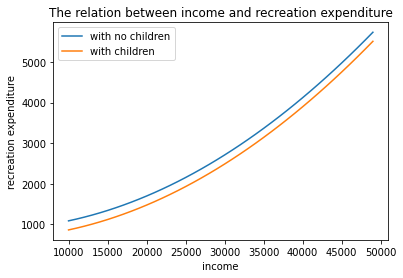

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(10000,50000,1000)
Y = 873 + 0.0012*X + 0.000002*(X**2)
Y_kids = (873-223.57) + 0.0012*X + 0.000002*(X**2)

plt1 = plt.plot(X, Y, label="with no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,postgres_pw,postgres_host,postgres_port,postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged', con=engine)

engine.dispose()


In [10]:
Y = weather_df['apparenttemperature'] - weather_df['temperature']
X = weather_df[['humidity','windspeed']]

X = sm.add_constant(Y)

results=sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.786e+35
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:57:31   Log-Likelihood:             3.1743e+06
No. Observations:               96453   AIC:                        -6.349e+06
Df Residuals:                   96451   BIC:                        -6.349e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.321e-16   4.72e-18    -91.554      0.0

In [11]:
Y = weather_df['apparenttemperature'] - weather_df['temperature']

weather_df["int_hum_wind"] = weather_df.humidity * weather_df.windspeed
X = weather_df[['humidity', 'windspeed','int_hum_wind']]

X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:57:33   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0839      0.033      2.511   

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [13]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [14]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [18]:
import statsmodels.api as sm
Y = house_prices_df['saleprice']
X = house_prices_df[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:59:10   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      

In [19]:
Y = house_prices_df['saleprice']
X = house_prices_df[['overallqual','grlivarea','garagecars','totalbsmtsf','mszoning_FV','mszoning_RL']]

X = sm.add_constant(X)

results=sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     803.3
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:03:02   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.087e+05   4792.537    -22.674      